In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import pandas as pd
import netCDF4

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker


from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.gridspec as gridspec

from datetime import datetime

import tol_colors as tc


import h5py

import scipy.stats
from scipy import stats


In [2]:
figfolder = './figure/'

dataset1 = 'ERA5'
dataset2 = 'MERRA2'
dataset3 = 'GOCCP'

mon_mar = 'Mar'
mon_sep = 'Sep'

ver_1 = 'lcc'
ver_2 = 'CLDLOW'


var_gc = 'low2D'


plev = 'level'
plevIndexer = 'level'

LatIndexer, LonIndexer = 'lat', 'lon'
lat = 'lat'
lon = 'lon'

dri = '/lss/research/agon-lab/ERA5_ITCZ_Subdaily/normalized_ctp_files/monthly_avg/'  #new_files/'
fn = 'ERA5_normalized_ctp_sc_lcc_2007_2016_2.5deg_monthly_avg.nc'
data_era = xr.open_dataset(dri+fn)


dri = '/lss/research/agon-lab/MERRA2_3hrly/normalized_ctp/monthly_avg/'  
fn = 'MERRA2_normalized_ctp_sc_lcc_2007_2016_2.5deg_monthly_avg.nc'
data_merra = xr.open_dataset(dri+fn)


dri = '/home/ffahrin/test/CASCCAD/'
fn = 'cusc_low2D_200701-201612_avg_interpolated.nc'
data_goccp = xr.open_dataset(dri+fn)

dri = '/home/ffahrin/test/CASCCAD/'
fn = 'CC_cusc_low2D_200701-201012_avg_interpolated.nc'
data_cc = xr.open_dataset(dri+fn)


In [3]:
data_merra

<xarray.Dataset> Size: 50kB
Dimensions:    (latitude: 25, longitude: 41, month: 12)
Coordinates:
  * latitude   (latitude) float32 100B -30.0 -27.5 -25.0 ... 25.0 27.5 30.0
  * longitude  (longitude) float32 164B 200.0 202.5 205.0 ... 295.0 297.5 300.0
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    CLDLOW     (month, latitude, longitude) float32 49kB ...

In [4]:
#dataset = 'CASCCAD'


var_gc_cu = 'allcu2D'
var_gc_sc = 'allsc2D'
#ver3 = 'allcu+sc3D'


dri = '/home/ffahrin/test/CASCCAD/'
fn = 'cusc_allcu2D_200701-201612_avg_interpolated.nc'
data_goccp_cu = xr.open_dataset(dri+fn)


fn = 'CC_cusc_allcu2D_200701-201012_avg_interpolated.nc'
data_cc_cu = xr.open_dataset(dri+fn)


fn = 'cusc_allsc2D_200701-201612_avg_interpolated.nc'
data_goccp_sc = xr.open_dataset(dri+fn)


fn = 'CC_cusc_allsc2D_200701-201012_avg_interpolated.nc'
data_cc_sc = xr.open_dataset(dri+fn)

#fn = 'cusc_allcu+sc3D_200701-201612_avg_interpolated.nc'
#data_cu_sc = xr.open_dataset(dri+fn)

In [5]:
lats = -30
latn = 30.
lonw = -150
lone = -60

lonw_eq = 200
lone_eq = 300

lev0 = 975
lev1 = 700

lev0_cc= 700
lev1_cc= 975

yr0 = 2007
yrf = 2016


In [6]:
era_mar = data_era[''+ver_1+''][2::12,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq)).mean(dim=('month'))

merra_mar= data_merra[''+ver_2+''][2::12,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq)).mean(dim=('month'))

In [7]:
era_mar

<xarray.DataArray 'lcc' (latitude: 25, longitude: 41)> Size: 4kB
array([[0.18038616, 0.17830345, 0.17231655, ..., 0.0180252 , 0.0463392 ,
        0.07203002],
       [0.1441947 , 0.1662078 , 0.14686053, ..., 0.03135607, 0.0262813 ,
        0.07064678],
       [0.11891042, 0.11202914, 0.13536534, ..., 0.01870206, 0.03322874,
        0.04479721],
       ...,
       [0.23581544, 0.21613652, 0.2058968 , ..., 0.17742825, 0.17201215,
        0.12777235],
       [0.25962386, 0.24501608, 0.2372282 , ..., 0.18167259, 0.18093702,
        0.16841213],
       [0.26619947, 0.25176722, 0.25025004, ..., 0.19484553, 0.18596376,
        0.14305322]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 200B -30.0 -27.5 -25.0 ... 25.0 27.5 30.0
  * longitude  (longitude) float64 328B 200.0 202.5 205.0 ... 295.0 297.5 300.0

In [8]:
era_annual = data_era[''+ver_1+''][:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq)).mean(dim=('month'))
era_annual

<xarray.DataArray 'lcc' (latitude: 25, longitude: 41)> Size: 4kB
array([[0.1734516 , 0.1849524 , 0.18285531, ..., 0.0085743 , 0.04503321,
        0.0734146 ],
       [0.17721765, 0.17275025, 0.17339031, ..., 0.01622223, 0.02605811,
        0.06026293],
       [0.16891909, 0.16800682, 0.1641375 , ..., 0.01254642, 0.03081747,
        0.04472799],
       ...,
       [0.14718744, 0.1465479 , 0.15296282, ..., 0.11065942, 0.11315909,
        0.11435292],
       [0.17109048, 0.17167062, 0.1769651 , ..., 0.12563656, 0.12870473,
        0.12767076],
       [0.18885402, 0.18115371, 0.18482025, ..., 0.13458702, 0.13431434,
        0.13327754]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 200B -30.0 -27.5 -25.0 ... 25.0 27.5 30.0
  * longitude  (longitude) float64 328B 200.0 202.5 205.0 ... 295.0 297.5 300.0

In [10]:
era_sep = data_era[''+ver_1+''][8::12,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq)).mean(dim=('month'))

merra_sep= data_merra[''+ver_2+''][8::12,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq)).mean(dim=('month'))

In [11]:
merra_annual= data_merra[''+ver_2+''][:,:,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq)).mean(dim=('month'))
merra_annual

<xarray.DataArray 'CLDLOW' (latitude: 25, longitude: 41)> Size: 4kB
array([[0.15093778, 0.15355307, 0.150589  , ..., 0.00542525, 0.01308115,
        0.0172292 ],
       [0.12859544, 0.1347171 , 0.14019386, ..., 0.00541654, 0.00861326,
        0.01354206],
       [0.11651442, 0.11530235, 0.11707416, ..., 0.00401335, 0.0062981 ,
        0.01018921],
       ...,
       [0.08322101, 0.08494572, 0.10303583, ..., 0.05010313, 0.04944621,
        0.05017456],
       [0.11673666, 0.11473291, 0.12665531, ..., 0.05624186, 0.05392605,
        0.05836885],
       [0.12120668, 0.11868849, 0.12455088, ..., 0.05704562, 0.05748045,
        0.06480093]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 100B -30.0 -27.5 -25.0 ... 25.0 27.5 30.0
  * longitude  (longitude) float32 164B 200.0 202.5 205.0 ... 295.0 297.5 300.0

In [12]:
cc_mar = data_goccp_sc[''+var_gc_sc+''][2::12,::-1,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq)).mean(dim=('time'))

In [13]:
cc_mar

<xarray.DataArray 'allsc2D' (latitude: 25, longitude: 41)> Size: 8kB
array([[0.07205827, 0.09188481, 0.09696091, ..., 0.01434409, 0.02319826,
        0.03216454],
       [0.04344065, 0.06474157, 0.07101065, ..., 0.02690827, 0.02473288,
        0.03102511],
       [0.04066356, 0.04180593, 0.05157522, ..., 0.0211625 , 0.01914165,
        0.02653213],
       ...,
       [0.11418722, 0.10692745, 0.14530901, ..., 0.0569556 , 0.05388978,
        0.04811581],
       [0.17530362, 0.15789962, 0.20010145, ..., 0.07269958, 0.077428  ,
        0.06732818],
       [0.23436871, 0.23677831, 0.25722682, ..., 0.07666015, 0.09695311,
        0.08884785]])
Coordinates:
  * latitude   (latitude) float32 100B -30.0 -27.5 -25.0 ... 25.0 27.5 30.0
  * longitude  (longitude) float32 164B 200.0 202.5 205.0 ... 295.0 297.5 300.0

In [14]:
cc_sep = data_goccp_sc[''+var_gc_sc+''][8::12,::-1,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq)).mean(dim=('time'))

In [15]:
cc_annual = data_goccp_sc[''+var_gc_sc+''][:,::-1,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq)).mean(dim=('time'))

In [16]:
calip_annual = data_cc_sc[''+var_gc_sc+''][:,::-1,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq)).mean(dim=('time'))
calip_mar = data_cc_sc[''+var_gc_sc+''][2::12,::-1,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq)).mean(dim=('time'))
calip_sep = data_cc_sc[''+var_gc_sc+''][8::12,::-1,:].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq)).mean(dim=('time'))

In [17]:
# land-sea mask
fn_lsm = '/lss/research/agon-lab/ERA5_ITCZ_daily/lsm_era5.nc'# load the land-sea mask here and do a where statement further down   
data_lsm = xr.open_dataset(fn_lsm)
lsm = data_lsm['lsm'][0,::-10,::10].sel(latitude=slice(lats,latn),longitude=slice(lonw_eq,lone_eq))
lsm_pr = data_lsm['lsm'][0,::,::].sel(latitude=slice(latn,lats),longitude=slice(lonw_eq,lone_eq))

In [18]:
era_mar_yz = era_mar.where(lsm==0)
era_sep_yz = era_sep.where(lsm==0)

In [19]:
cc_mar_yz = cc_mar.where(lsm==0)
cc_sep_yz = cc_sep.where(lsm==0)

In [20]:
cc_annual_yz = cc_annual.where(lsm==0)
era_annual_yz = era_annual.where(lsm ==0)
merra_annual_yz = merra_annual.where(lsm==0)

In [21]:
calip_mar_yz = calip_mar.where(lsm==0)
calip_sep_yz = calip_sep.where(lsm==0)
calip_annual_yz = calip_annual.where(lsm==0)

In [22]:
lat = merra_mar['latitude']
lon = merra_mar['longitude']

merra_mar_xr= xr.DataArray(merra_mar, coords=[lat, lon], dims=['latitude', 'longitude'])
merra_sep_xr= xr.DataArray(merra_sep, coords=[lat, lon], dims=['latitude', 'longitude'])
#merra_pr_xr = xr.DataArray(merra_pr, coords=[lat, lon], dims=['latitude', 'longitude'])

In [23]:
merra_xr_mar_yz = merra_mar_xr.where(lsm==0)
merra_xr_sep_yz = merra_sep_xr.where(lsm==0)
#merra_pr_xr_yz = merra_pr_xr.where(lsm_pr==0)

In [24]:
diff_era = era_mar_yz - era_sep_yz
diff_cc = cc_mar_yz - cc_sep_yz
diff_merra =  merra_xr_mar_yz - merra_xr_sep_yz
diff_calip = calip_mar_yz - calip_sep_yz
merra_xr_sep_yz.max()*100

<xarray.DataArray 'CLDLOW' ()> Size: 8B
array(75.13068318)
Coordinates:
    time     datetime64[ns] 8B 1979-01-01

In [25]:
cc_sep_yz.max()*100

<xarray.DataArray 'allsc2D' ()> Size: 8B
array(84.38073695)
Coordinates:
    time     datetime64[ns] 8B 1979-01-01

In [26]:
era_sep_yz.max()*100

<xarray.DataArray 'lcc' ()> Size: 8B
array(75.41565895)
Coordinates:
    time     datetime64[ns] 8B 1979-01-01

In [27]:
variable = 'cf'

In [28]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [29]:
from matplotlib.patches import Rectangle

In [30]:
import matplotlib.patches as patches
props = dict( facecolor='white', alpha=1)

In [31]:
calip_prc = str(round(np.nanmean(calip_annual_yz*100)))+'%'
cc_prc = str(round(np.nanmean(cc_annual_yz*100)))+'%'
era_prc = str(round(np.nanmean(era_annual_yz*100)))+'%'
merra_prc = str(round(np.nanmean(merra_annual_yz*100)))+'%'

#--------------------------------------------------------------
calip_mar = str(round(np.nanmean(calip_mar_yz*100)))+'%'
cc_mar = str(round(np.nanmean(cc_mar_yz*100)))+'%'
era_mar = str(round(np.nanmean(era_mar_yz*100)))+'%'
merra_mar = str(round(np.nanmean(merra_xr_mar_yz*100)))+'%'


#-------------------------------------------------------------
calip_sep = str(round(np.nanmean(calip_sep_yz*100)))+'%'
cc_sep = str(round(np.nanmean(cc_sep_yz*100)))+'%'
era_sep = str(round(np.nanmean(era_sep_yz*100)))+'%'
merra_sep = str(round(np.nanmean(merra_xr_sep_yz*100)))+'%'



In [32]:
data_era_flat = era_annual_yz.stack(zy=("latitude", "longitude"))
data_merra_flat = merra_annual_yz.stack(zy=("latitude", "longitude"))
data_gc_flat = cc_annual_yz.stack(zy=("latitude", "longitude"))

In [33]:
era_sep_flat = era_sep_yz.stack(zy=("latitude", "longitude"))
merra_sep_flat = merra_xr_sep_yz.stack(zy=("latitude", "longitude"))
gc_sep_flat = cc_sep_yz.stack(zy=("latitude", "longitude"))

In [34]:
era_mar_flat = era_mar_yz.stack(zy=("latitude", "longitude"))
merra_mar_flat = merra_xr_mar_yz.stack(zy=("latitude", "longitude"))
gc_mar_flat = cc_mar_yz.stack(zy=("latitude", "longitude"))

In [35]:
corr_era = (np.round(xr.corr(data_gc_flat, data_era_flat),2))#, data_gc_flat)
corr_era_sep = (np.round(xr.corr(gc_sep_flat, era_sep_flat),2))
corr_era_mar = (np.round(xr.corr(gc_mar_flat, era_mar_flat),2))

In [36]:
corr_merra = (np.round(xr.corr(data_gc_flat, data_merra_flat),2))#, data_gc_flat)
corr_merra_sep = (np.round(xr.corr(gc_sep_flat, merra_sep_flat),2))
corr_merra_mar = (np.round(xr.corr(gc_mar_flat, merra_mar_flat),2))

In [37]:
era_diff = diff_era.stack(zy=("latitude", "longitude"))
merra_diff = diff_merra.stack(zy=("latitude", "longitude"))
cc_diff = diff_cc.stack(zy=("latitude", "longitude"))
corr_era_diff = (np.round(xr.corr(cc_diff, era_diff),2))
corr_merra_diff = (np.round(xr.corr(cc_diff, merra_diff),2))

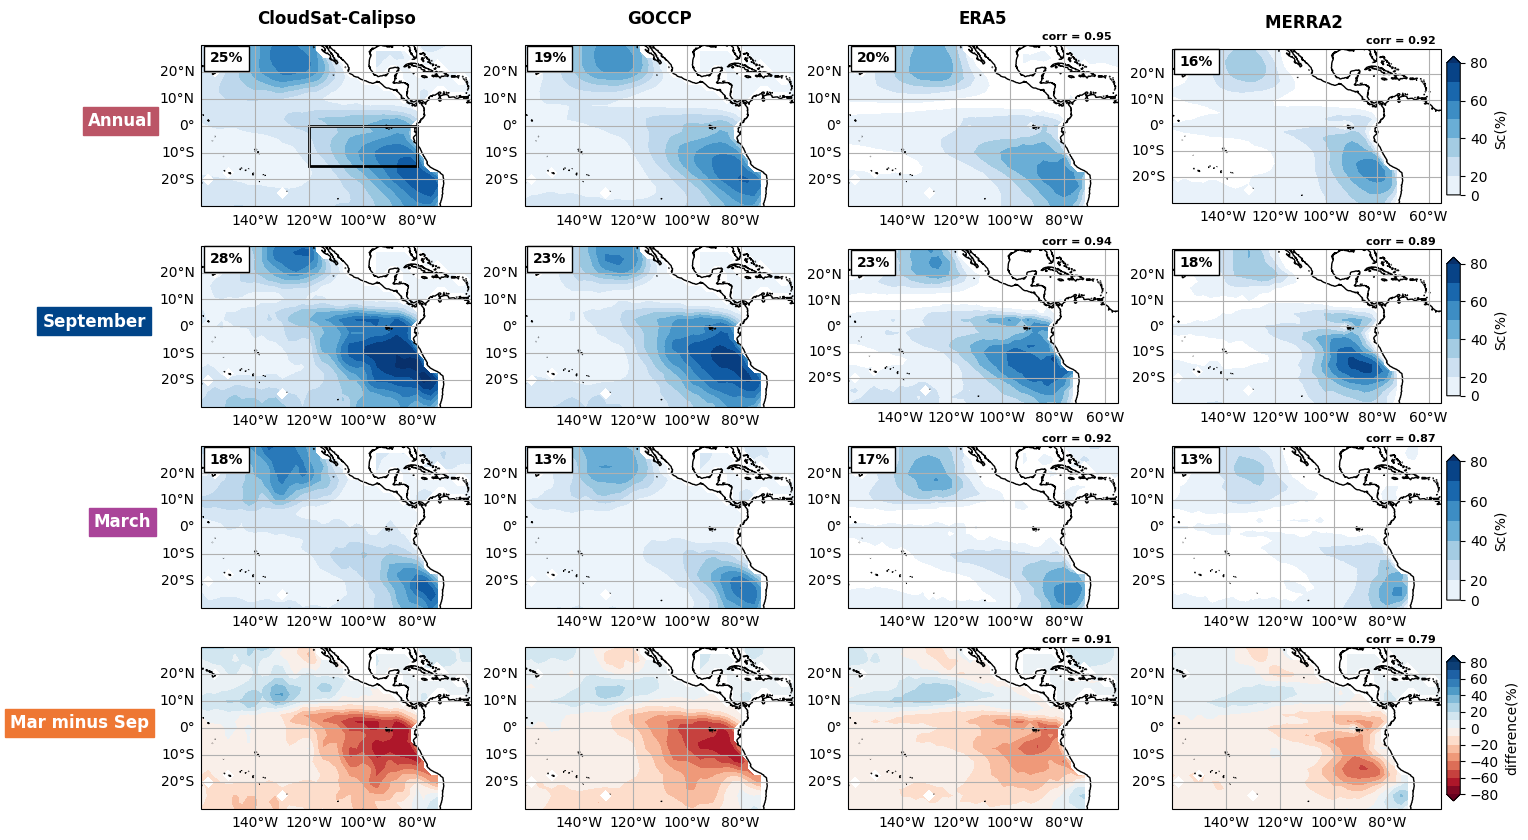

In [40]:
cmap = plt.matplotlib.colormaps.get_cmap("Blues")
cmap_diff = plt.matplotlib.colormaps.get_cmap('RdBu')#.reversed()
npan = 4
c = "black"
levels = [ 2,6,12,16,20,24,28,32,36,40 ]

levels_mar = [ 2,6,12,16,20 ]
lev = [3]
lev_pr = [4]
alp= 0.6

props1 = dict(boxstyle='square', facecolor="#BB5566", edgecolor ="#BB5566" )
props2 = dict(boxstyle='square', facecolor="#004488", edgecolor ="#004488" )
props3 = dict(boxstyle='square', facecolor="#AA4499", edgecolor ="#AA4499" )
props4 = dict(boxstyle='square', facecolor="#EE7733", edgecolor ="#EE7733" )

lev_cc = np.arange(0, 100, 10)
#lev_cc = np.arange(0,45,5)
lev_era = np.arange(10,90,10)
#lev_era =  np.arange(0, 20, 2)
#lev_era = np.arange(0, 30,2)
#levels_mra =  np.arange(0, 20, 2)

lev_diff = np.arange (-80 ,90, 10)
lev_diff_cc = np.arange(-12,13,1)
lev_diff_mra = np.arange(-1.8, 2, .2)

# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(16, 10))#, tight_layout=True)
for j in range(0,16,1):
    ax1 = fig.add_subplot(4,npan,j+1,projection=ccrs.PlateCarree())
    ax1.coastlines('50m')
    gl = ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
    gl.top_labels = False
    gl.right_labels = False

    if j == 0:

        cf = plt.contourf(calip_annual_yz['longitude'], calip_annual_yz['latitude'], calip_annual_yz*100,cmap=cmap, levels=lev_cc, extend ='max')
        #cf1 = plt.contour(imrg_yz['longitude'], imrg_yz['latitude'], imrg_yz, lev, colors=c, alpha=alp, linewidths=2.5)
        plt.title('CloudSat-Calipso', loc='center',fontsize=12,fontweight = 'bold',pad = 15)
        plt.text(-202, 0, 'Annual', dict(size=12), color = 'white',bbox = props1, fontweight = 'bold')
        someX, someY = -120, -15
        currentAxis = plt.gca()
        currentAxis.add_patch(Rectangle((someX , someY ), 40, 15,edgecolor = 'black', facecolor="none", lw =2, linestyle = '-'))
        ax1.text(0.03, 0.96, calip_prc, transform=ax1.transAxes, fontsize=10, fontweight = 'bold',
            verticalalignment='top', bbox=props)
       

    if j == 1:

        cf = plt.contourf(cc_annual_yz['longitude'], cc_annual_yz['latitude'], cc_annual_yz*100,cmap=cmap, levels=lev_cc, extend ='max')
        plt.title('GOCCP', loc='center',fontsize=12,fontweight = 'bold',pad = 15)
        
        
        someX, someY = -120, -15
        currentAxis = plt.gca()
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15, alpha = 0.5, edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
        ax1.text(0.03, 0.96, cc_prc, transform=ax1.transAxes, fontsize=10,fontweight = 'bold',
            verticalalignment='top', bbox=props)
       

        
    elif j == 2:

        cf = plt.contourf(era_annual_yz['longitude'], era_annual_yz['latitude'], era_annual_yz*100,cmap=cmap,levels=lev_era,extend ='max')
        plt.title('ERA5', loc='center',fontsize=12,fontweight = 'bold',pad = 15)
        currentAxis = plt.gca()
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15, alpha = 0.5, edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
        ax1.text(0.03, 0.96, era_prc, transform=ax1.transAxes, fontsize=10,fontweight = 'bold',
            verticalalignment='top', bbox=props)
        ax1.text(0.72, 1.08, 'corr = '+str(corr_era.values)+'', transform=ax1.transAxes, fontsize=8, fontweight = 'bold',
            verticalalignment='top')
            


    elif j == 3:

        cf = plt.contourf(merra_annual_yz['longitude'], merra_annual_yz['latitude'], merra_annual_yz*100,cmap=cmap, levels=lev_era,extend ='max')
        plt.title('MERRA2 ', loc='center',fontsize=12,fontweight = 'bold',pad = 15)
    
        someX, someY = -120, -15
        currentAxis = plt.gca()
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15,  alpha = 0.5,edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
        
        axins = inset_axes(ax1,
           width="5%", # width = 10% of parent_bbox width
           height="90%", # height : 50%
           loc=6,
           bbox_to_anchor=(1.02, 0., 1, 1),
           bbox_transform=ax1.transAxes,
           borderpad=0,)
        cbar = plt.colorbar(cf, cax=axins)
        cbar.set_label(r'Sc(%)', fontsize=10)
        cbar.set_ticks(np.arange(0,100, 20))
        ax1.text(0.03, 0.96, merra_prc, transform=ax1.transAxes, fontsize=10,fontweight = 'bold',
            verticalalignment='top', bbox=props)
        ax1.text(0.72, 1.08, 'corr = '+str(corr_merra.values)+'', transform=ax1.transAxes, fontsize=8, fontweight = 'bold',
            verticalalignment='top')
            
    
    
    elif j == 4:
        cf = plt.contourf(calip_sep_yz['longitude'], calip_sep_yz['latitude'], calip_sep_yz*100,cmap=cmap, levels=lev_cc, extend ='max')
        plt.text(-219, 0, 'September', dict(size=12), color = 'white',bbox = props2, fontweight = 'bold')
        someX, someY = -120, -15
        currentAxis = plt.gca()
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15, alpha = 0.5, edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
        ax1.text(0.03, 0.96, calip_sep, transform=ax1.transAxes, fontsize=10,fontweight = 'bold',
            verticalalignment='top', bbox=props)
       
        
    elif j == 5:
        cf = plt.contourf(cc_sep_yz['longitude'], cc_sep_yz['latitude'], cc_sep_yz*100,cmap=cmap,levels=lev_cc,extend ='max')
        someX, someY = -120, -15
        currentAxis = plt.gca()
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15,  alpha = 0.5,edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
        ax1.text(0.03, 0.96, cc_sep, transform=ax1.transAxes, fontsize=10,fontweight = 'bold',
            verticalalignment='top', bbox=props)
        


    
    elif j == 6:
        cf = plt.contourf(era_sep_yz['longitude'], era_sep_yz['latitude'], era_sep_yz*100,cmap=cmap,levels=lev_era,extend ='neither')
        someX, someY = -120, -15
        currentAxis = plt.gca()
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15,  alpha = 0.5,edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
        ax1.text(0.03, 0.96, era_sep, transform=ax1.transAxes, fontsize=10,fontweight = 'bold',
            verticalalignment='top', bbox=props)
        ax1.text(0.72, 1.08, 'corr = '+str(corr_era_sep.values)+'', transform=ax1.transAxes, fontsize=8, fontweight = 'bold',
            verticalalignment='top')
            
        
    elif j == 7:
        cf = plt.contourf(merra_xr_mar_yz['longitude'], merra_xr_mar_yz['latitude'], merra_xr_sep_yz*100,cmap=cmap,levels=lev_era,extend ='max')
        someX, someY = -120, -15
        currentAxis = plt.gca()
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15,  alpha = 0.5,edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
        axins = inset_axes(ax1,
           width="5%", # width = 10% of parent_bbox width
           height="90%", # height : 50%
           loc=6,
           bbox_to_anchor=(1.02, 0., 1, 1),
           bbox_transform=ax1.transAxes,
           borderpad=0,)
        cbar = plt.colorbar(cf, cax=axins)
        cbar.set_label(r'Sc(%)', fontsize=10)
        cbar.set_ticks(np.arange(0,100, 20))
        ax1.text(0.03, 0.96, merra_sep, transform=ax1.transAxes, fontsize=10,fontweight = 'bold',
            verticalalignment='top', bbox=props)
        ax1.text(0.72, 1.08, 'corr = '+str(corr_merra_sep.values)+'', transform=ax1.transAxes, fontsize=8, fontweight = 'bold',
            verticalalignment='top')
            

    elif j == 8:
        cf = plt.contourf(calip_mar_yz['longitude'], calip_mar_yz['latitude'], calip_mar_yz*100,cmap=cmap,levels=lev_cc,extend ='max')
        plt.text(-200, 0, 'March', dict(size=12), color = 'white',bbox = props3, fontweight = 'bold')
        someX, someY = -120, -15
        currentAxis = plt.gca()
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15,  alpha = 0.5,edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
        ax1.text(0.03, 0.96, calip_mar, transform=ax1.transAxes, fontsize=10,fontweight = 'bold',
            verticalalignment='top', bbox=props)

    
    elif j == 9:
        cf = plt.contourf(cc_mar_yz['longitude'], cc_mar_yz['latitude'], cc_mar_yz*100,cmap=cmap,levels=lev_cc,extend ='max')
        someX, someY = -120, -15
        currentAxis = plt.gca()
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15,  alpha = 0.5,edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
        ax1.text(0.03, 0.96, cc_mar, transform=ax1.transAxes, fontsize=10,fontweight = 'bold',
            verticalalignment='top', bbox=props)

    elif j == 10:
        cf = plt.contourf(era_mar_yz['longitude'], era_mar_yz['latitude'], era_mar_yz*100,cmap=cmap,levels=lev_era,extend ='max')
        someX, someY = -120, -15
        currentAxis = plt.gca()
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15, alpha = 0.5, edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
        ax1.text(0.03, 0.96, era_mar, transform=ax1.transAxes, fontsize=10,fontweight = 'bold',
            verticalalignment='top', bbox=props)
        ax1.text(0.72, 1.08, 'corr = '+str(corr_era_mar.values)+'', transform=ax1.transAxes, fontsize=8, fontweight = 'bold',
            verticalalignment='top')
        


    elif j == 11:
        cf = plt.contourf(merra_xr_mar_yz['longitude'], merra_xr_mar_yz['latitude'], merra_xr_mar_yz*100,cmap=cmap,levels=lev_era,extend ='max')
        
        someX, someY = -120, -15
        currentAxis = plt.gca()
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15,  alpha = 0.5,edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
        axins = inset_axes(ax1,
           width="5%", # width = 10% of parent_bbox width
           height="90%", # height : 50%
           loc=6,
           bbox_to_anchor=(1.02, 0., 1, 1),
           bbox_transform=ax1.transAxes,
           borderpad=0,)
        cbar = plt.colorbar(cf, cax=axins)
        cbar.set_label(r'Sc(%)', fontsize=10)
        cbar.set_ticks(np.arange(0,100, 20))
        ax1.text(0.03, 0.96, merra_mar, transform=ax1.transAxes, fontsize=10,fontweight = 'bold',
            verticalalignment='top', bbox=props)
        ax1.text(0.72, 1.08, 'corr = '+str(corr_merra_mar.values)+'', transform=ax1.transAxes, fontsize=8, fontweight = 'bold',
            verticalalignment='top')

    elif j == 12:
        cf = plt.contourf(calip_mar_yz['longitude'], calip_mar_yz['latitude'], diff_calip*100,cmap=cmap_diff,levels=lev_diff,extend ='both')
        plt.text(-231, 0, 'Mar minus Sep', dict(size=12), color = 'white',bbox = props4, fontweight = 'bold')
        someX, someY = -120, -15
        currentAxis = plt.gca()
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15,  alpha = 0.5,edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
        

    
    elif j == 13:
        cf = plt.contourf(cc_mar_yz['longitude'], cc_mar_yz['latitude'], diff_cc*100,cmap=cmap_diff,levels=lev_diff,extend ='both')
        someX, someY = -120, -15
        currentAxis = plt.gca()
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15,  alpha = 0.5,edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
        
        
    elif j == 14:
        cf = plt.contourf(era_mar_yz['longitude'], era_mar_yz['latitude'], diff_era*100,cmap=cmap_diff,levels=lev_diff,extend ='both')
        someX, someY = -120, -15
        currentAxis = plt.gca()
        ax1.text(0.72, 1.08, 'corr = '+str(corr_era_diff.values)+'', transform=ax1.transAxes, fontsize=8, fontweight = 'bold',
            verticalalignment='top')
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15,  alpha = 0.5,edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
       
    elif j == 15:
        cf = plt.contourf(merra_xr_mar_yz['longitude'], merra_xr_mar_yz['latitude'], diff_merra*100,cmap=cmap_diff,levels=lev_diff,extend ='both')
        ax1.text(0.72, 1.08, 'corr = '+str(corr_merra_diff.values)+'', transform=ax1.transAxes, fontsize=8, fontweight = 'bold',
            verticalalignment='top')
        
        someX, someY = -120, -15
        currentAxis = plt.gca()
        #currentAxis.add_patch(Rectangle((someX , someY ), 40, 15,  alpha = 0.5, edgecolor = 'black', facecolor="none", lw =2, linestyle = '--'))
        #cbar.set_label(r'cloud fraction (%)', fontsize=10)
        axins = inset_axes(ax1,
           width="5%", # width = 10% of parent_bbox width
           height="90%", # height : 50%
           loc=6,
           bbox_to_anchor=(1.02, 0., 1, 1),
           bbox_transform=ax1.transAxes,
           borderpad=0,)
        cbar = plt.colorbar(cf, cax=axins)
    
        cbar.set_label(r'difference(%)', fontsize=10)
       


#plt.savefig(figfolder+'normalized_sc_lcc_map_'+dataset3+'_'+dataset1+'_'+dataset2+'_'+str(yr0)+'-'+str(yrf)+'.pdf' ,bbox_inches="tight",transparent=False)
